# Explorando los datos


In [1]:
pip install pandas


[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Importando librerias y datos


In [3]:
#imports
import pathlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


RUTA = pathlib.Path(__vsc_ipynb_file__).parent.parent # type: ignore

data = pd.read_csv(f"{RUTA}/data/FraudulentECoomerce5.csv", encoding='latin1', sep=',', on_bad_lines='skip')
data.shape

(1999899, 22)

## Previsualizando datos


In [4]:
data.head()

,Amount,Errors,Is_Fraud,Gender,Direccion,Ciudad,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,...,Day,Dia_Semana,Time,BancoCredito,TipoTarjeta,LimiteCredito,Merchant_Name,Merchant_City,Merchant_State,Zip
0,11473,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,2,Miércoles,17:30:00.0000000,Amex,Credit,33900,-7269691894846892021,Burke,VA,220150
1,-9900,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,20,Domingo,06:40:00.0000000,Amex,Credit,33900,1799189980464955940,Burke,VA,220150
2,13029,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,29,Martes,10:39:00.0000000,Amex,Credit,33900,1913477460590765860,Vienna,VA,221820
3,5500,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,17,Domingo,07:07:00.0000000,Amex,Credit,33900,2027553650310142703,Burke,VA,220150
4,1167,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,18,Lunes,11:15:00.0000000,Amex,Credit,33900,7069584154815291371,Burke,VA,220150


In [5]:
data.head()

,Amount,Errors,Is_Fraud,Gender,Direccion,Ciudad,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,...,Day,Dia_Semana,Time,BancoCredito,TipoTarjeta,LimiteCredito,Merchant_Name,Merchant_City,Merchant_State,Zip
0,11473,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,2,Miércoles,17:30:00.0000000,Amex,Credit,33900,-7269691894846892021,Burke,VA,220150
1,-9900,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,20,Domingo,06:40:00.0000000,Amex,Credit,33900,1799189980464955940,Burke,VA,220150
2,13029,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,29,Martes,10:39:00.0000000,Amex,Credit,33900,1913477460590765860,Vienna,VA,221820
3,5500,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,17,Domingo,07:07:00.0000000,Amex,Credit,33900,2027553650310142703,Burke,VA,220150
4,1167,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,18,Lunes,11:15:00.0000000,Amex,Credit,33900,7069584154815291371,Burke,VA,220150


In [6]:
data.columns

Index(['Amount', 'Errors', 'Is_Fraud', 'Gender', 'Direccion', 'Ciudad',
       'IngresoPerCapita', 'IngresoAnual', 'DebitoTotal', 'FICO_Score', 'Year',
       'Month', 'Day', 'Dia_Semana', 'Time', 'BancoCredito', 'TipoTarjeta',
       'LimiteCredito', 'Merchant_Name', 'Merchant_City', 'Merchant_State',
       'Zip'],
      dtype='object')

Columna a eliminar: Dirección, Genero, Ciudad, Mercha Name, Mechant City, Mechant State, Zip, Day, Período.

Encoder: banco credito y tipo de tarjeta, Time cambiar de tipo. Limpieza: outlier negativos en Amount. Armar histograma con las columnas finales

### Tipos de errores

In [7]:
error_counts = data['Errors'].value_counts()
print(error_counts)

Errors
SIN ERROR               1967955
Insufficient Balance      20073
Bad PIN                    4763
Technical Glitch           4010
Bad Card Number            1084
Bad CVV                     936
Bad Expiration              910
Bad Zipcode                 168
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'SIN ERROR'),
  Text(1, 0, 'Insufficient Balance'),
  Text(2, 0, 'Bad PIN'),
  Text(3, 0, 'Technical Glitch'),
  Text(4, 0, 'Bad Card Number'),
  Text(5, 0, 'Bad CVV'),
  Text(6, 0, 'Bad Expiration'),
  Text(7, 0, 'Bad Zipcode')])

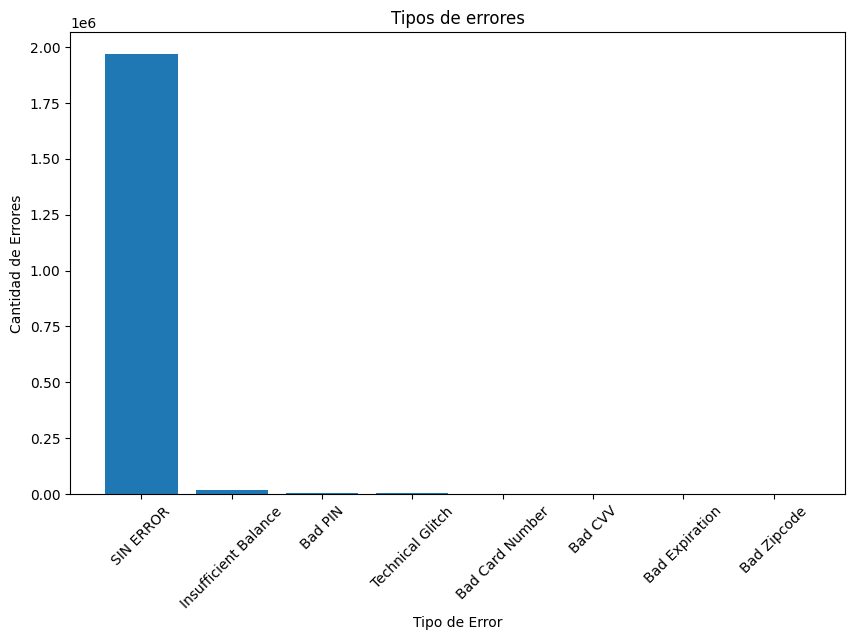

In [8]:
plt.figure(figsize=(10, 6))
bars = plt.bar(error_counts.index, error_counts.values)
plt.title("Tipos de errores")
plt.xlabel("Tipo de Error")
plt.ylabel("Cantidad de Errores")
plt.xticks(rotation=45)

In [9]:
data['Gender'].value_counts()

Gender
Female    1028083
Male       971816
Name: count, dtype: int64

In [10]:
data['Time'].value_counts

<bound method IndexOpsMixin.value_counts of 0          17:30:00.0000000
1          06:40:00.0000000
2          10:39:00.0000000
3          07:07:00.0000000
4          11:15:00.0000000
                 ...       
1999894    06:36:00.0000000
1999895    06:53:00.0000000
1999896    07:29:00.0000000
1999897    05:34:00.0000000
1999898    08:41:00.0000000
Name: Time, Length: 1999899, dtype: object>

In [11]:
data['Time'].isna().value_counts()


Time
False    1999899
Name: count, dtype: int64

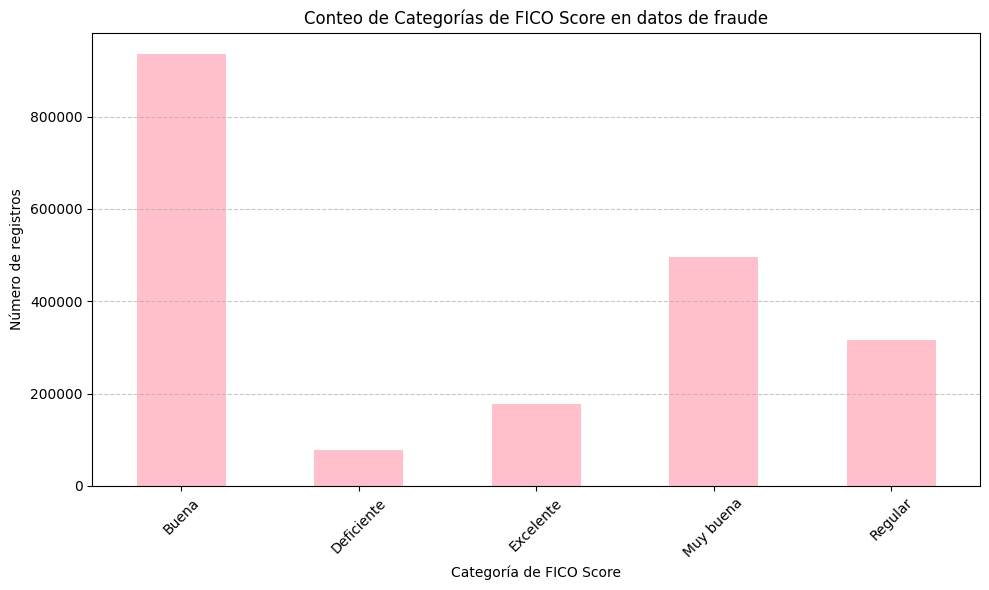

In [12]:
# Definir las categorías y los rangos de puntajes FICO
categorias = {
    'Excelente': range(800, 1000),
    'Muy buena': range(740, 800),
    'Buena': range(670, 740),
    'Regular': range(580, 670),
    'Deficiente': range(300, 580)
}

# Función para asignar la categoría correspondiente a cada puntaje FICO
def asignar_categoria(score):
    for cat, rango in categorias.items():
        if score in rango:
            return cat
    return 'Desconocido'  # En caso de puntajes fuera de los rangos definidos

# Aplicar la función para crear una nueva columna 'Categoria'
data['Categoria'] = data['FICO_Score'].apply(asignar_categoria)

# Contar los valores en cada categoría
conteo_categorias = data['Categoria'].value_counts().sort_index()

# Graficar los valores de conteo por categoría
plt.figure(figsize=(10, 6))
conteo_categorias.plot(kind='bar', color='pink')
plt.title('Conteo de Categorías de FICO Score en datos de fraude')
plt.xlabel('Categoría de FICO Score')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Outlier de Amount

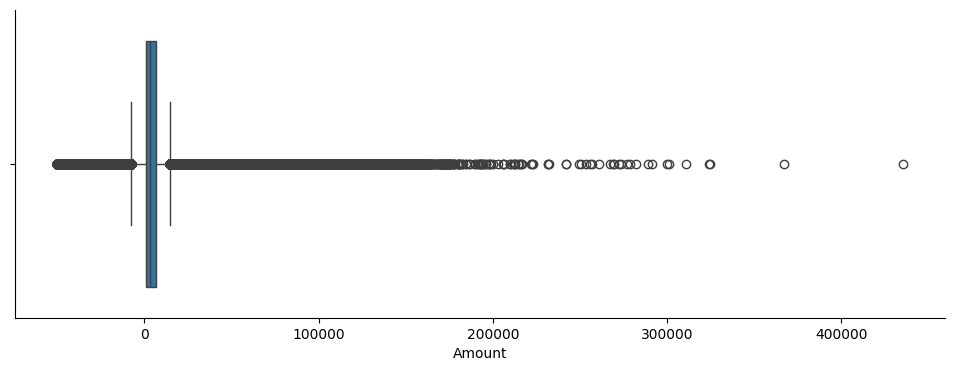

In [13]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=data['Amount'])
sns.despine()

In [14]:
data['Amount'].quantile(0.05)

np.float64(-5000.0)

In [15]:
data['Amount'].quantile(0.95)

np.float64(14665.0)

Rango intercuartílico

In [16]:
def clean_outliers_q3(dataset, Amount):
    """Returns dataset removing the outlier rows from column Amount."""
    interesting_col = dataset[Amount]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (2.5 * interesting_col.quantile(.75)))
    return dataset[mask_outlier]

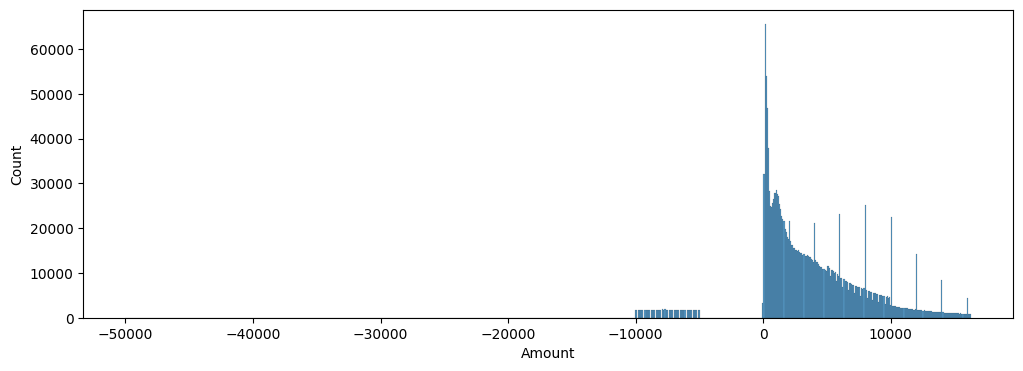

In [17]:
# Aplicación de la función
data = clean_outliers_q3(data, 'Amount')

# Configura el tamaño de la figura
fig = plt.figure(figsize=(12, 4))

# Crea el histograma
sns.histplot(data['Amount'])

# Muestra el gráfico
plt.show()

Eliminar datos negativos en Amount

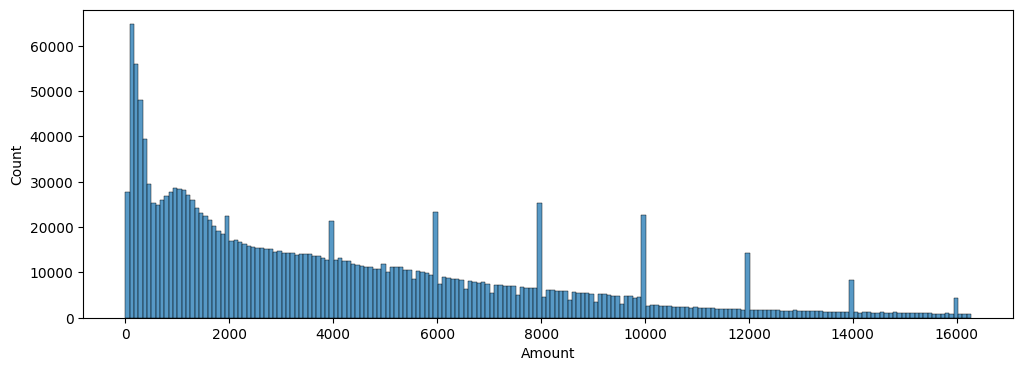

In [18]:
# Eliminar valores negativos de la columna 'Amount'
data = data[data['Amount'] >= 0]

# Configura el tamaño de la figura
fig = plt.figure(figsize=(12, 4))

# Crea el histograma
sns.histplot(data['Amount'])

# Muestra el gráfico
plt.show()

In [19]:
len(data['Amount'])

1820518

In [20]:
len(data)

1820518

### Test de hipótesis

La hipótesis nula es que el score "bueno" no es significativamente distinto a los demás scores.

In [21]:
# Filtrar datos por categoría 'Bueno' y los demás
score_bueno = data[data['Categoria'] == 'Buena']['FICO_Score']
otros_scores = data[data['Categoria'] != 'Buena']['FICO_Score']

In [22]:
score_bueno

0          727
2          727
3          727
4          727
5          727
          ... 
1999878    680
1999880    733
1999884    733
1999891    690
1999898    681
Name: FICO_Score, Length: 849931, dtype: int64

In [23]:
from scipy.stats import ttest_ind

# Supongamos que ya tienes score_bueno y otros_scores definidos como en el ejemplo anterior

# Realizar la prueba t de muestras independientes
statistic, p_value = ttest_ind(score_bueno, otros_scores)

# Imprimir los resultados
print(f'Estadístico de prueba t: {statistic}')
print(f'Valor p: {p_value}')

# Interpretar el resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print('Se rechaza la hipótesis nula. Hay evidencia suficiente para concluir que el score FICO "Bueno" es significativamente más alto que los demás scores.')
else:
    print('No se puede rechazar la hipótesis nula. No hay suficiente evidencia para concluir que el score FICO "Bueno" es significativamente más alto que los demás scores.')


Estadístico de prueba t: -136.16181937182571
Valor p: 0.0
Se rechaza la hipótesis nula. Hay evidencia suficiente para concluir que el score FICO "Bueno" es significativamente más alto que los demás scores.


In [24]:
data['LimiteCredito'].describe()

count    1.820518e+06
mean     1.505704e+04
std      1.198112e+04
min      0.000000e+00
25%      7.564000e+03
50%      1.320000e+04
75%      2.013800e+04
max      1.512230e+05
Name: LimiteCredito, dtype: float64

In [25]:
data['IngresoAnual'].describe()

count    1.820518e+06
mean     4.602522e+04
std      2.370429e+04
min      1.000000e+00
25%      3.253100e+04
50%      4.047300e+04
75%      5.370200e+04
max      3.070180e+05
Name: IngresoAnual, dtype: float64

In [26]:
data['TipoTarjeta'].value_counts()

TipoTarjeta
Debit              1130591
Credit              560440
Debit (Prepaid)     129487
Name: count, dtype: int64

In [27]:
data['BancoCredito'].value_counts()

BancoCredito
Mastercard    982815
Visa          668013
Amex          116330
Discover       53360
Name: count, dtype: int64

In [28]:
data['Dia_Semana'].value_counts()

Dia_Semana
Sábado       261381
Jueves       260765
Domingo      260335
Viernes      260109
Lunes        259801
Martes       259184
Miércoles    258943
Name: count, dtype: int64

### Filtro para registros etiquetados como fraude

In [29]:
fraude = data[data['Is_Fraud'] == 1]

In [30]:
fraude.head()

,Amount,Errors,Is_Fraud,Gender,Direccion,Ciudad,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,...,Dia_Semana,Time,BancoCredito,TipoTarjeta,LimiteCredito,Merchant_Name,Merchant_City,Merchant_State,Zip,Categoria
2847,15041,SIN ERROR,1,Male,273 Ocean Street,Ridgefield,27308,55682,82696,750,...,Sábado,12:16:00.0000000,Mastercard,Debit,24090,-6268696014554094643,Mexico City,Mexico,0,Muy buena
11409,10285,SIN ERROR,1,Female,5380 12th Boulevard,Hot Springs National Park,15857,32330,97190,835,...,Jueves,11:29:00.0000000,Amex,Credit,11600,4573875080712571902,Mexico City,Mexico,0,Excelente
12829,3910,SIN ERROR,1,Female,412 Burns Drive,Ewa Beach,22778,42306,472,725,...,Sábado,14:12:00.0000000,Visa,Debit,15516,-1939141273423816814,Mexico City,Mexico,0,Buena
22131,11126,SIN ERROR,1,Female,690 Oak Street,Milwaukee,19483,36465,12789,688,...,Miércoles,12:36:00.0000000,Visa,Debit,5616,-182867164065511464,Mexico City,Mexico,0,Buena
26068,7607,SIN ERROR,1,Female,8886 Little Creek Street,Edgerton,21348,43529,126175,797,...,Lunes,12:06:00.0000000,Mastercard,Debit (Prepaid),95,5774328053313854202,Mexico City,Mexico,0,Muy buena


Columna a

In [31]:
fraude['Gender'].value_counts()

Gender
Female    966
Male      890
Name: count, dtype: int64

In [32]:
x = fraude['Gender']

In [33]:
y = fraude['Is_Fraud']

<BarContainer object of 1856 artists>

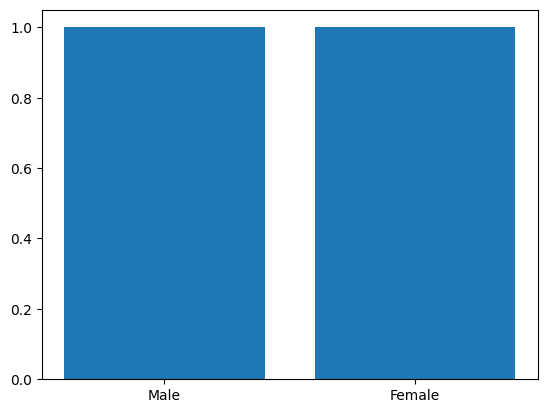

In [34]:
fig, ax = plt.subplots()
ax.bar(x = x, height = y)
# plt.show()

In [35]:
fraude.describe()

,Amount,Is_Fraud,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,Day,LimiteCredito,Merchant_Name,Zip
count,1856.000000,1856.0,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1.856000e+03,1856.000000
mean,5990.953664,1.0,23099.970366,44546.953125,54578.003233,718.883082,2012.123922,6.529634,15.394397,14157.518858,1.226564e+16,93376.330819
std,4637.828984,0.0,11139.413060,23295.595294,49212.504708,64.626264,4.645463,3.488941,8.911705,11753.586425,4.949176e+18,231584.654885
min,0.000000,1.0,0.000000,1.000000,0.000000,488.000000,1997.000000,1.000000,1.000000,0.000000,-9.123914e+18,0.000000
25%,1640.000000,1.0,16920.000000,31901.000000,16040.000000,686.000000,2008.000000,3.000000,7.000000,6732.000000,-4.282467e+18,0.000000
50%,5460.000000,1.0,20570.000000,39871.000000,48465.000000,720.000000,2013.000000,7.000000,15.000000,12566.000000,-2.807195e+17,0.000000
75%,9496.750000,1.0,26124.250000,52065.000000,81402.000000,760.000000,2016.000000,10.000000,23.000000,19400.000000,4.573875e+18,0.000000
max,16269.000000,1.0,163145.000000,249925.000000,461854.000000,850.000000,2019.000000,12.000000,31.000000,125723.000000,9.204012e+18,986860.000000


In [36]:
fraude['LimiteCredito'].describe() #bajo

count      1856.000000
mean      14157.518858
std       11753.586425
min           0.000000
25%        6732.000000
50%       12566.000000
75%       19400.000000
max      125723.000000
Name: LimiteCredito, dtype: float64

In [37]:
fraude['IngresoAnual'].describe() #bajo

count      1856.000000
mean      44546.953125
std       23295.595294
min           1.000000
25%       31901.000000
50%       39871.000000
75%       52065.000000
max      249925.000000
Name: IngresoAnual, dtype: float64

In [38]:
fraude['FICO_Score'].value_counts()

FICO_Score
850    35
684    35
698    31
689    27
752    25
       ..
540     1
601     1
554     1
488     1
595     1
Name: count, Length: 250, dtype: int64

In [39]:
fraude['TipoTarjeta'].value_counts()

TipoTarjeta
Debit              1061
Credit              612
Debit (Prepaid)     183
Name: count, dtype: int64

In [40]:
fraude['BancoCredito'].value_counts()

BancoCredito
Mastercard    964
Visa          704
Amex          129
Discover       59
Name: count, dtype: int64

In [41]:
fraude['Dia_Semana'].value_counts()

Dia_Semana
Domingo      353
Jueves       324
Viernes      289
Sábado       235
Martes       231
Lunes        222
Miércoles    202
Name: count, dtype: int64

/var/folders/f_/5hywl__n0q183x7_820b9hrw0000gn/T/ipykernel_6941/3533395080.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraude['Categoria'] = fraude['FICO_Score'].apply(asignar_categoria)


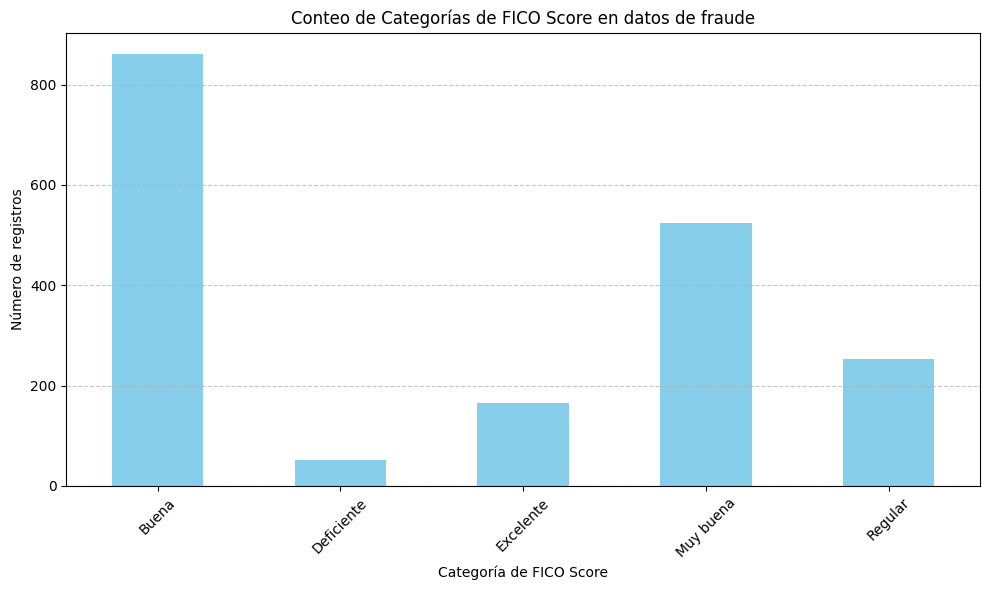

In [42]:
# Definir las categorías y los rangos de puntajes FICO
categorias = {
    'Excelente': range(800, 1000),
    'Muy buena': range(740, 800),
    'Buena': range(670, 740),
    'Regular': range(580, 670),
    'Deficiente': range(300, 580)
}

# Función para asignar la categoría correspondiente a cada puntaje FICO
def asignar_categoria(score):
    for cat, rango in categorias.items():
        if score in rango:
            return cat
    return 'Desconocido'  # En caso de puntajes fuera de los rangos definidos

# Aplicar la función para crear una nueva columna 'Categoria'
fraude['Categoria'] = fraude['FICO_Score'].apply(asignar_categoria)

# Contar los valores en cada categoría
conteo_categorias = fraude['Categoria'].value_counts().sort_index()

# Graficar los valores de conteo por categoría
plt.figure(figsize=(10, 6))
conteo_categorias.plot(kind='bar', color='skyblue')
plt.title('Conteo de Categorías de FICO Score en datos de fraude')
plt.xlabel('Categoría de FICO Score')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Cambiar tipo de variable para Time

In [43]:
data['Time'] = pd.to_datetime(data['Time'])

/var/folders/f_/5hywl__n0q183x7_820b9hrw0000gn/T/ipykernel_6941/3567905165.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


### Eliminar columnas

In [44]:
data = data.drop(['Gender', 'Direccion', 'Ciudad','Merchant_Name', 'Merchant_City', 'Merchant_State',
       'Zip', 'Categoria', 'Day'], axis=1)

## Encodings

### Encoding para errores

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
# Verificar las primeras filas del DataFrame original y la columna 'Errors'
print(data.head())
print(data['Errors'].unique())

# Crear el objeto OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)

# Aplicar el OneHotEncoder a la columna 'Errors'
try:
    encoded_errors = encoder.fit_transform(data[['Errors']])
except Exception as e:
    print(f"Error al aplicar OneHotEncoder: {e}")

# Crear un DataFrame con las nuevas columnas de variables binarias
encoded_errors_df = pd.DataFrame(encoded_errors, columns=encoder.get_feature_names_out(['Errors']))

# Verificar si hay nulos en el DataFrame resultante
print(encoded_errors_df.isnull().sum())

# Mostrar las primeras filas del DataFrame resultante
print(encoded_errors_df.head())

   Amount     Errors  Is_Fraud  IngresoPerCapita  IngresoAnual  DebitoTotal  \
0   11473  SIN ERROR         0             35563         72510        44317   
2   13029  SIN ERROR         0             35563         72510        44317   
3    5500  SIN ERROR         0             35563         72510        44317   
4    1167  SIN ERROR         0             35563         72510        44317   
5     995  SIN ERROR         0             35563         72510        44317   

   FICO_Score  Year  Month Dia_Semana                Time BancoCredito  \
0         727  1991      1  Miércoles 2024-07-24 17:30:00         Amex   
2         727  1991      1     Martes 2024-07-24 10:39:00         Amex   
3         727  1991      2    Domingo 2024-07-24 07:07:00         Amex   
4         727  1991      2      Lunes 2024-07-24 11:15:00         Amex   
5         727  1991      3     Sábado 2024-07-24 18:03:00         Amex   

  TipoTarjeta  LimiteCredito  
0      Credit          33900  
2      Credit     

In [47]:
# Concatenar las nuevas columnas de variables binarias al DataFrame original
df = pd.concat([data, encoded_errors_df], axis=1)

# Eliminar la columna original 'Errors' si ya no es necesaria
df.drop('Errors', axis=1, inplace=True)

# Mostrar las primeras filas del DataFrame actualizado
print(df.head())

    Amount  Is_Fraud  IngresoPerCapita  IngresoAnual  DebitoTotal  FICO_Score  \
0  11473.0       0.0           35563.0       72510.0      44317.0       727.0   
2  13029.0       0.0           35563.0       72510.0      44317.0       727.0   
3   5500.0       0.0           35563.0       72510.0      44317.0       727.0   
4   1167.0       0.0           35563.0       72510.0      44317.0       727.0   
5    995.0       0.0           35563.0       72510.0      44317.0       727.0   

     Year  Month Dia_Semana                Time  ... TipoTarjeta  \
0  1991.0    1.0  Miércoles 2024-07-24 17:30:00  ...      Credit   
2  1991.0    1.0     Martes 2024-07-24 10:39:00  ...      Credit   
3  1991.0    2.0    Domingo 2024-07-24 07:07:00  ...      Credit   
4  1991.0    2.0      Lunes 2024-07-24 11:15:00  ...      Credit   
5  1991.0    3.0     Sábado 2024-07-24 18:03:00  ...      Credit   

  LimiteCredito  Errors_Bad CVV  Errors_Bad Card Number  \
0       33900.0             0.0              

In [48]:
df.head()

,Amount,Is_Fraud,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,Dia_Semana,Time,...,TipoTarjeta,LimiteCredito,Errors_Bad CVV,Errors_Bad Card Number,Errors_Bad Expiration,Errors_Bad PIN,Errors_Bad Zipcode,Errors_Insufficient Balance,Errors_SIN ERROR,Errors_Technical Glitch
0,11473.0,0.0,35563.0,72510.0,44317.0,727.0,1991.0,1.0,Miércoles,2024-07-24 17:30:00,...,Credit,33900.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,13029.0,0.0,35563.0,72510.0,44317.0,727.0,1991.0,1.0,Martes,2024-07-24 10:39:00,...,Credit,33900.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5500.0,0.0,35563.0,72510.0,44317.0,727.0,1991.0,2.0,Domingo,2024-07-24 07:07:00,...,Credit,33900.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1167.0,0.0,35563.0,72510.0,44317.0,727.0,1991.0,2.0,Lunes,2024-07-24 11:15:00,...,Credit,33900.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,995.0,0.0,35563.0,72510.0,44317.0,727.0,1991.0,3.0,Sábado,2024-07-24 18:03:00,...,Credit,33900.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
df.shape

(1984473, 21)

In [50]:
print("*************************************************\n")

print(f"Valores dupllicados: {data.duplicated().sum()}\n")
print("*************************************************\n")

print("Valores nulos: \n")
print(data.isnull().sum())

print("*************************************************\n")
print(data.info())

*************************************************

Valores dupllicados: 45

*************************************************

Valores nulos: 

Amount              0
Errors              0
Is_Fraud            0
IngresoPerCapita    0
IngresoAnual        0
DebitoTotal         0
FICO_Score          0
Year                0
Month               0
Dia_Semana          0
Time                0
BancoCredito        0
TipoTarjeta         0
LimiteCredito       0
dtype: int64
*************************************************

<class 'pandas.core.frame.DataFrame'>
Index: 1820518 entries, 0 to 1999898
Data columns (total 14 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Amount            int64         
 1   Errors            object        
 2   Is_Fraud          int64         
 3   IngresoPerCapita  int64         
 4   IngresoAnual      int64         
 5   DebitoTotal       int64         
 6   FICO_Score        int64         
 7   Year              int64      

In [51]:
print("*************************************************\n")
print(data.describe().T)

#data.select_dtypes(include='number').columns

*************************************************

                      count                           mean  \
Amount            1820518.0                    4105.718341   
Is_Fraud          1820518.0                       0.001019   
IngresoPerCapita  1820518.0                    23668.34499   
IngresoAnual      1820518.0                   46025.221988   
DebitoTotal       1820518.0                   57899.110118   
FICO_Score        1820518.0                     712.809235   
Year              1820518.0                    2011.982009   
Month             1820518.0                       6.525921   
Time                1820518  2024-07-24 12:52:10.073011968   
LimiteCredito     1820518.0                   15057.039455   

                                  min                  25%  \
Amount                            0.0               1088.0   
Is_Fraud                          0.0                  0.0   
IngresoPerCapita                  0.0              16920.0   
IngresoAnual      

In [52]:
data.columns

Index(['Amount', 'Errors', 'Is_Fraud', 'IngresoPerCapita', 'IngresoAnual',
       'DebitoTotal', 'FICO_Score', 'Year', 'Month', 'Dia_Semana', 'Time',
       'BancoCredito', 'TipoTarjeta', 'LimiteCredito'],
      dtype='object')

### Encoding para Dia_Semana

In [53]:
data['Dia_Semana'].value_counts()

Dia_Semana
Sábado       261381
Jueves       260765
Domingo      260335
Viernes      260109
Lunes        259801
Martes       259184
Miércoles    258943
Name: count, dtype: int64

In [54]:
# 1. Crear y ajustar el OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(data[['Dia_Semana']])  # Ajustar el encoder solo a la columna 'Dia_semana'

# 2. Transformar los datos
encoded_errors = encoder.transform(data[['Dia_Semana']])

# 3. Crear un DataFrame con las nuevas columnas de variables binarias
encoded_errors_dfs = pd.DataFrame(encoded_errors.toarray(), columns=encoder.get_feature_names_out(['Dia_Semana']))

# 4. Verificar si hay nulos en el DataFrame resultante
print(encoded_errors_dfs.isnull().sum())


Dia_Semana_Domingo      0
Dia_Semana_Jueves       0
Dia_Semana_Lunes        0
Dia_Semana_Martes       0
Dia_Semana_Miércoles    0
Dia_Semana_Sábado       0
Dia_Semana_Viernes      0
dtype: int64


In [55]:
encoded_errors_dfs.head()

,Dia_Semana_Domingo,Dia_Semana_Jueves,Dia_Semana_Lunes,Dia_Semana_Martes,Dia_Semana_Miércoles,Dia_Semana_Sábado,Dia_Semana_Viernes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Encoding para BancoCredito


In [56]:
data.columns

Index(['Amount', 'Errors', 'Is_Fraud', 'IngresoPerCapita', 'IngresoAnual',
       'DebitoTotal', 'FICO_Score', 'Year', 'Month', 'Dia_Semana', 'Time',
       'BancoCredito', 'TipoTarjeta', 'LimiteCredito'],
      dtype='object')

In [57]:
data['BancoCredito'].value_counts()

BancoCredito
Mastercard    982815
Visa          668013
Amex          116330
Discover       53360
Name: count, dtype: int64

In [58]:
# 1. Crear y ajustar el OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(data[['BancoCredito']])  # Ajustar el encoder solo a la columna 'Dia_semana'

# 2. Transformar los datos
encoded_errors = encoder.transform(data[['BancoCredito']])

# 3. Crear un DataFrame con las nuevas columnas de variables binarias
encoded_errors_dfc = pd.DataFrame(encoded_errors.toarray(), columns=encoder.get_feature_names_out(['BancoCredito']))

# 4. Verificar si hay nulos en el DataFrame resultante
print(encoded_errors_dfc.isnull().sum())

BancoCredito_Amex          0
BancoCredito_Discover      0
BancoCredito_Mastercard    0
BancoCredito_Visa          0
dtype: int64


In [59]:
encoded_errors_dfc

,BancoCredito_Amex,BancoCredito_Discover,BancoCredito_Mastercard,BancoCredito_Visa
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
1820513,0.0,0.0,0.0,1.0
1820514,0.0,0.0,0.0,1.0
1820515,0.0,0.0,0.0,1.0
1820516,0.0,0.0,1.0,0.0


### Encoding para Tarjeta


In [60]:
data['TipoTarjeta'].value_counts()

TipoTarjeta
Debit              1130591
Credit              560440
Debit (Prepaid)     129487
Name: count, dtype: int64

In [61]:
# 1. Crear y ajustar el OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(data[['TipoTarjeta']])  # Ajustar el encoder solo a la columna 'Dia_semana'

# 2. Transformar los datos
encoded_errors = encoder.transform(data[['TipoTarjeta']])

# 3. Crear un DataFrame con las nuevas columnas de variables binarias
encoded_errors_dft = pd.DataFrame(encoded_errors.toarray(), columns=encoder.get_feature_names_out(['TipoTarjeta']))

# 4. Verificar si hay nulos en el DataFrame resultante
print(encoded_errors_dft.isnull().sum())

TipoTarjeta_Credit             0
TipoTarjeta_Debit              0
TipoTarjeta_Debit (Prepaid)    0
dtype: int64


In [62]:
encoded_errors_dft

,TipoTarjeta_Credit,TipoTarjeta_Debit,TipoTarjeta_Debit (Prepaid)
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
1820513,1.0,0.0,0.0
1820514,1.0,0.0,0.0
1820515,0.0,1.0,0.0
1820516,0.0,1.0,0.0


# Creamos las variables binarias
dummies = pd.get_dummies(df['race'], drop_first = False)
dummies.head()

In [63]:
print(data.select_dtypes(include='number').columns)#object
print(f"##################################")

print(data.select_dtypes(include='object').columns)#object
print(f"##################################")

Index(['Amount', 'Is_Fraud', 'IngresoPerCapita', 'IngresoAnual', 'DebitoTotal',
       'FICO_Score', 'Year', 'Month', 'LimiteCredito'],
      dtype='object')
##################################
Index(['Errors', 'Dia_Semana', 'BancoCredito', 'TipoTarjeta'], dtype='object')
##################################


In [64]:
df.head()

,Amount,Is_Fraud,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,Dia_Semana,Time,...,TipoTarjeta,LimiteCredito,Errors_Bad CVV,Errors_Bad Card Number,Errors_Bad Expiration,Errors_Bad PIN,Errors_Bad Zipcode,Errors_Insufficient Balance,Errors_SIN ERROR,Errors_Technical Glitch
0,11473.0,0.0,35563.0,72510.0,44317.0,727.0,1991.0,1.0,Miércoles,2024-07-24 17:30:00,...,Credit,33900.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,13029.0,0.0,35563.0,72510.0,44317.0,727.0,1991.0,1.0,Martes,2024-07-24 10:39:00,...,Credit,33900.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5500.0,0.0,35563.0,72510.0,44317.0,727.0,1991.0,2.0,Domingo,2024-07-24 07:07:00,...,Credit,33900.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1167.0,0.0,35563.0,72510.0,44317.0,727.0,1991.0,2.0,Lunes,2024-07-24 11:15:00,...,Credit,33900.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,995.0,0.0,35563.0,72510.0,44317.0,727.0,1991.0,3.0,Sábado,2024-07-24 18:03:00,...,Credit,33900.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Merge

In [65]:
nuevo_merge = pd.concat([df, encoded_errors_dfs],axis=1) #dia_semana

In [66]:
df = nuevo_merge 

In [67]:
merged_dn = pd.concat([df, encoded_errors_dfc], axis=1)

In [68]:
df = merged_dn

In [69]:
merge_dt = pd.concat([df,encoded_errors_dft],axis=1)

In [70]:
df = merge_dt

In [83]:
df.columns

Index(['Amount', 'Is_Fraud', 'IngresoPerCapita', 'IngresoAnual', 'DebitoTotal',
       'FICO_Score', 'Year', 'Month', 'Dia_Semana', 'Time', 'BancoCredito',
       'TipoTarjeta', 'LimiteCredito', 'Errors_Bad CVV',
       'Errors_Bad Card Number', 'Errors_Bad Expiration', 'Errors_Bad PIN',
       'Errors_Bad Zipcode', 'Errors_Insufficient Balance', 'Errors_SIN ERROR',
       'Errors_Technical Glitch', 'Dia_Semana_Domingo', 'Dia_Semana_Jueves',
       'Dia_Semana_Lunes', 'Dia_Semana_Martes', 'Dia_Semana_Miércoles',
       'Dia_Semana_Sábado', 'Dia_Semana_Viernes', 'BancoCredito_Amex',
       'BancoCredito_Discover', 'BancoCredito_Mastercard', 'BancoCredito_Visa',
       'TipoTarjeta_Credit', 'TipoTarjeta_Debit',
       'TipoTarjeta_Debit (Prepaid)'],
      dtype='object')

### Correlación

In [71]:
columnas_numericas = df.select_dtypes(include='number').columns
print("Columnas numéricas:", columnas_numericas)

# Ensure that numeric_columns is a DataFrame


if isinstance(columnas_numericas, pd.DataFrame):
    cor = columnas_numericas.corr()
    print(cor)

Columnas numéricas: Index(['Amount', 'Is_Fraud', 'IngresoPerCapita', 'IngresoAnual', 'DebitoTotal',
       'FICO_Score', 'Year', 'Month', 'LimiteCredito', 'Errors_Bad CVV',
       'Errors_Bad Card Number', 'Errors_Bad Expiration', 'Errors_Bad PIN',
       'Errors_Bad Zipcode', 'Errors_Insufficient Balance', 'Errors_SIN ERROR',
       'Errors_Technical Glitch', 'Dia_Semana_Domingo', 'Dia_Semana_Jueves',
       'Dia_Semana_Lunes', 'Dia_Semana_Martes', 'Dia_Semana_Miércoles',
       'Dia_Semana_Sábado', 'Dia_Semana_Viernes', 'BancoCredito_Amex',
       'BancoCredito_Discover', 'BancoCredito_Mastercard', 'BancoCredito_Visa',
       'TipoTarjeta_Credit', 'TipoTarjeta_Debit',
       'TipoTarjeta_Debit (Prepaid)'],
      dtype='object')


In [72]:
# Assuming df is your original DataFrame and columnas_numericas is an Index object
df_numeric = df[columnas_numericas]

# Now you can calculate the correlation
cor = df_numeric.corr()
cor

,Amount,Is_Fraud,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,LimiteCredito,Errors_Bad CVV,...,Dia_Semana_Miércoles,Dia_Semana_Sábado,Dia_Semana_Viernes,BancoCredito_Amex,BancoCredito_Discover,BancoCredito_Mastercard,BancoCredito_Visa,TipoTarjeta_Credit,TipoTarjeta_Debit,TipoTarjeta_Debit (Prepaid)
Amount,1.000000,0.016385,0.108027,0.108279,0.053164,-0.021580,-0.034525,0.000165,0.081058,0.001284,...,0.000190,-0.000180,0.000498,0.001184,0.000868,-0.000153,-0.000746,-0.000299,0.000487,-0.000382
Is_Fraud,0.016385,1.000000,-0.001578,-0.001992,-0.002047,0.002900,0.000890,0.000034,-0.002398,0.000140,...,0.000650,-0.000600,0.001333,-0.000110,0.000921,0.000283,-0.000560,-0.000116,0.000529,-0.000790
IngresoPerCapita,0.108027,-0.001578,1.000000,0.949345,0.433041,-0.044281,0.000033,-0.000779,0.579966,0.000413,...,-0.001415,0.000184,0.001207,0.000199,-0.000741,0.000434,-0.000290,-0.000529,0.000353,0.000285
IngresoAnual,0.108279,-0.001992,0.949345,1.000000,0.502904,-0.041522,0.007401,-0.001255,0.550164,0.000489,...,-0.001307,0.000854,0.001217,-0.000170,-0.000790,0.000490,-0.000144,-0.000489,0.000431,0.000065
DebitoTotal,0.053164,-0.002047,0.433041,0.502904,1.000000,-0.115876,0.044428,-0.001226,0.250317,-0.000298,...,-0.001233,0.001585,-0.000120,-0.000894,-0.001740,0.000455,0.000592,-0.001815,0.001294,0.000818
FICO_Score,-0.021580,0.002900,-0.044281,-0.041522,-0.115876,1.000000,-0.019906,-0.001687,0.040103,-0.001336,...,-0.000171,-0.000049,-0.000550,0.001090,0.000942,-0.001604,0.000776,0.001322,-0.000633,-0.001180
Year,-0.034525,0.000890,0.000033,0.007401,0.044428,-0.019906,1.000000,-0.055926,0.014622,0.001153,...,-0.003190,0.001258,-0.000117,-0.021665,-0.026456,0.010571,0.009320,-0.022798,0.016445,0.009905
Month,0.000165,0.000034,-0.000779,-0.001255,-0.001226,-0.001687,-0.055926,1.000000,-0.001180,-0.001020,...,0.001600,0.003310,0.001941,-0.000334,-0.000166,-0.000384,0.000625,0.000172,-0.000636,0.000891
LimiteCredito,0.081058,-0.002398,0.579966,0.550164,0.250317,0.040103,0.014622,-0.001180,1.000000,-0.000105,...,-0.000313,-0.000109,0.001525,-0.000841,-0.001573,-0.000078,0.001058,-0.001358,0.000826,0.000881
Errors_Bad CVV,0.001284,0.000140,0.000413,0.000489,-0.000298,-0.001336,0.001153,-0.001020,-0.000105,1.000000,...,-0.000740,-0.000178,0.000367,0.001246,-0.001430,-0.000797,0.000692,0.000812,-0.002004,0.002325


### Matriz de correlación

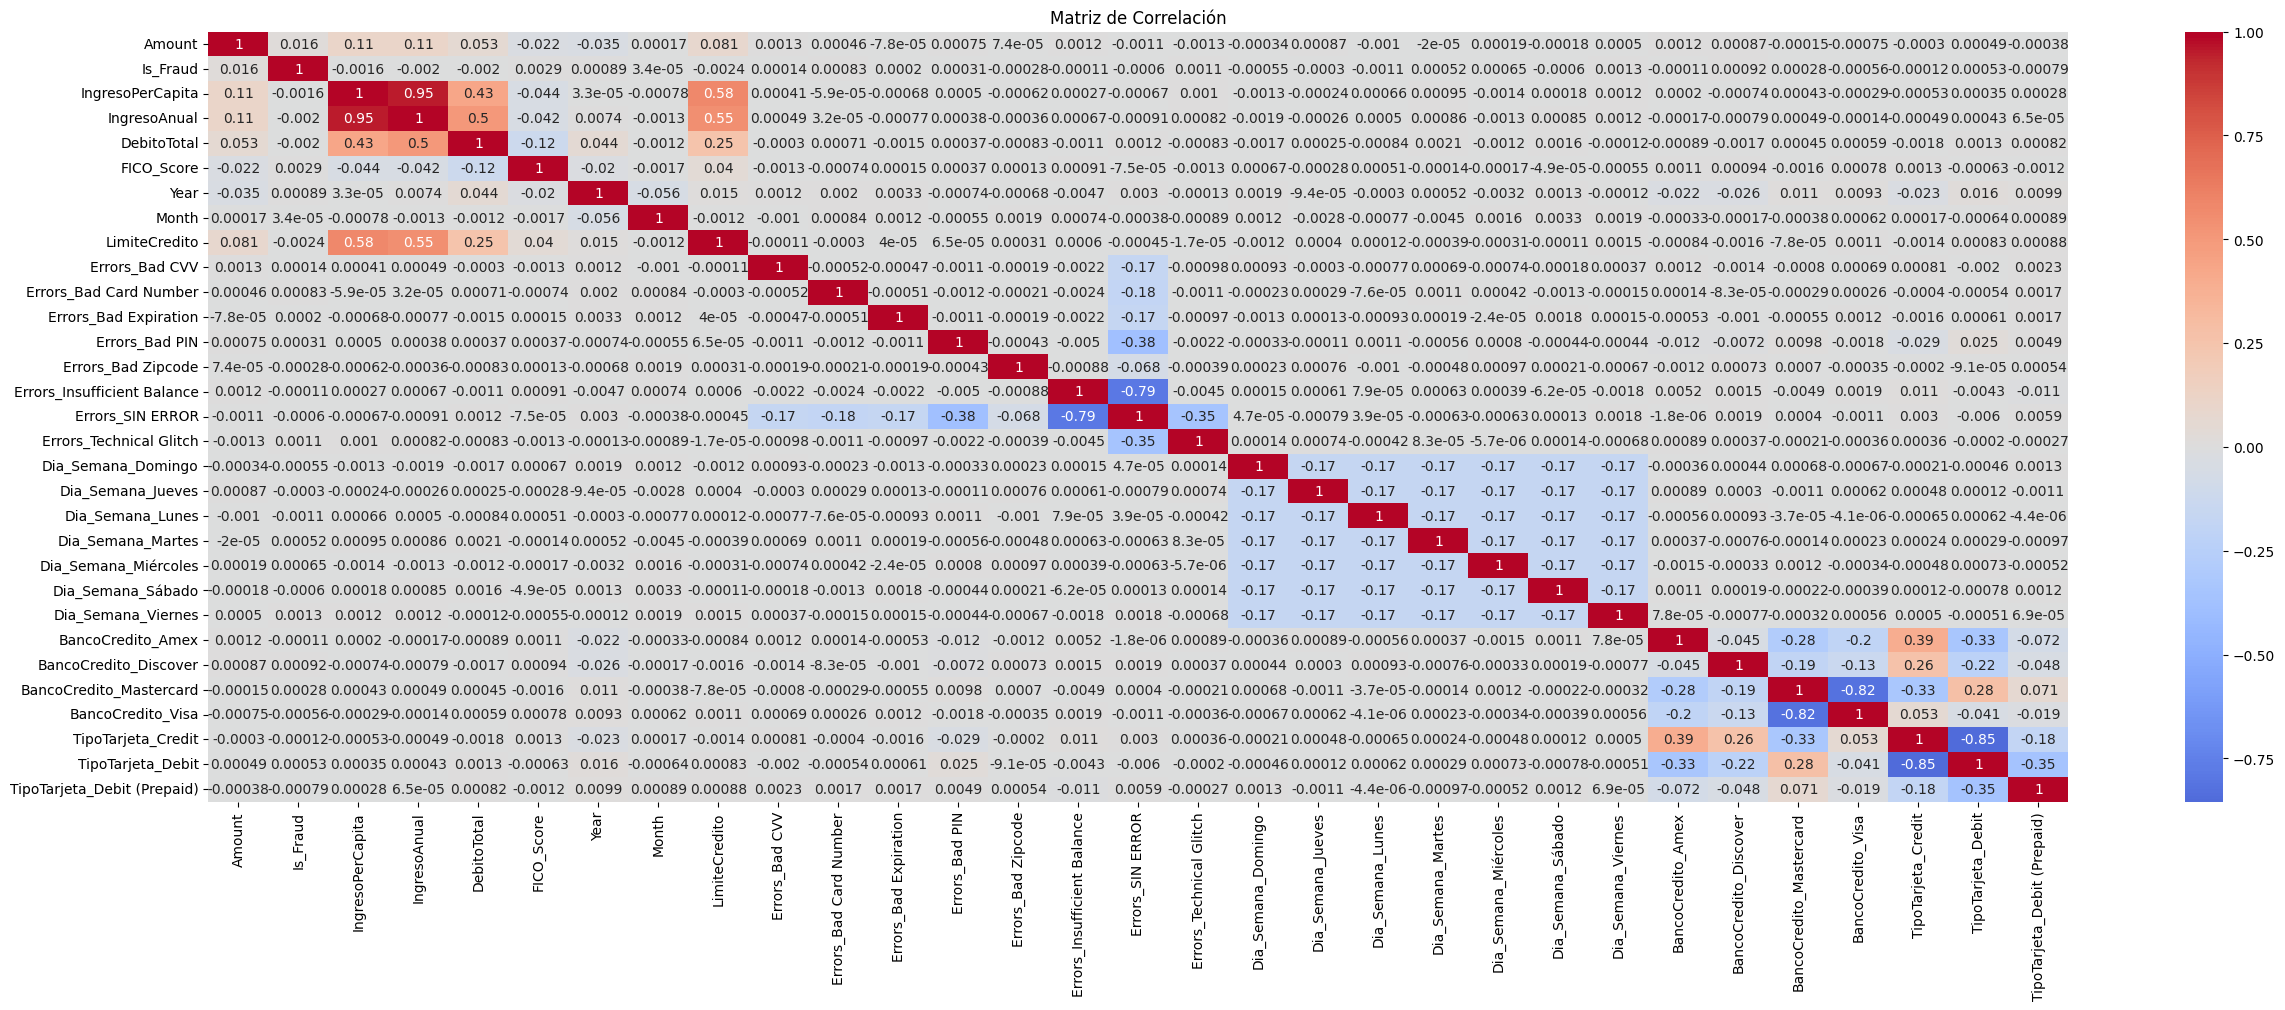

In [73]:
# Graficar la matriz de correlación usando seaborn
plt.figure(figsize=(30, 10))
sns.heatmap(cor, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [74]:
df.columns

Index(['Amount', 'Is_Fraud', 'IngresoPerCapita', 'IngresoAnual', 'DebitoTotal',
       'FICO_Score', 'Year', 'Month', 'Dia_Semana', 'Time', 'BancoCredito',
       'TipoTarjeta', 'LimiteCredito', 'Errors_Bad CVV',
       'Errors_Bad Card Number', 'Errors_Bad Expiration', 'Errors_Bad PIN',
       'Errors_Bad Zipcode', 'Errors_Insufficient Balance', 'Errors_SIN ERROR',
       'Errors_Technical Glitch', 'Dia_Semana_Domingo', 'Dia_Semana_Jueves',
       'Dia_Semana_Lunes', 'Dia_Semana_Martes', 'Dia_Semana_Miércoles',
       'Dia_Semana_Sábado', 'Dia_Semana_Viernes', 'BancoCredito_Amex',
       'BancoCredito_Discover', 'BancoCredito_Mastercard', 'BancoCredito_Visa',
       'TipoTarjeta_Credit', 'TipoTarjeta_Debit',
       'TipoTarjeta_Debit (Prepaid)'],
      dtype='object')

In [84]:
df.to_csv('df_listo.csv', index=False)

print("Archivo CSV exportado exitosamente.")

Archivo CSV exportado exitosamente.


### Prueba - año 2019

Filtrar por año 2019

In [75]:
filtered_df = df[df['Year'] == 2019]

In [76]:
filtered_df.head()

,Amount,Is_Fraud,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,Dia_Semana,Time,...,Dia_Semana_Miércoles,Dia_Semana_Sábado,Dia_Semana_Viernes,BancoCredito_Amex,BancoCredito_Discover,BancoCredito_Mastercard,BancoCredito_Visa,TipoTarjeta_Credit,TipoTarjeta_Debit,TipoTarjeta_Debit (Prepaid)
1765101,2780.0,0.0,14709.0,18100.0,0.0,682.0,2019.0,3.0,Viernes,2024-07-24 15:40:00,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1765102,6714.0,0.0,34188.0,69706.0,97070.0,785.0,2019.0,3.0,Viernes,2024-07-24 01:50:00,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1765103,7164.0,0.0,24981.0,50936.0,88447.0,681.0,2019.0,3.0,Viernes,2024-07-24 10:56:00,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1765104,360.0,0.0,21956.0,44768.0,59862.0,728.0,2019.0,3.0,Viernes,2024-07-24 14:03:00,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1765105,2640.0,0.0,17278.0,35227.0,25277.0,746.0,2019.0,3.0,Viernes,2024-07-24 19:41:00,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [77]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129339 entries, 1765101 to 1999866
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Amount                       129339 non-null  float64       
 1   Is_Fraud                     129339 non-null  float64       
 2   IngresoPerCapita             129339 non-null  float64       
 3   IngresoAnual                 129339 non-null  float64       
 4   DebitoTotal                  129339 non-null  float64       
 5   FICO_Score                   129339 non-null  float64       
 6   Year                         129339 non-null  float64       
 7   Month                        129339 non-null  float64       
 8   Dia_Semana                   129339 non-null  object        
 9   Time                         129339 non-null  datetime64[ns]
 10  BancoCredito                 129339 non-null  object        
 11  TipoTarjeta             

In [78]:
columnas_numericas1 = filtered_df.select_dtypes(include='number').columns
print("Columnas numéricas:", columnas_numericas1)

# Ensure that numeric_columns is a DataFrame


if isinstance(columnas_numericas1, pd.DataFrame):
    cor = columnas_numericas1.corr()
    print(cor)

Columnas numéricas: Index(['Amount', 'Is_Fraud', 'IngresoPerCapita', 'IngresoAnual', 'DebitoTotal',
       'FICO_Score', 'Year', 'Month', 'LimiteCredito', 'Errors_Bad CVV',
       'Errors_Bad Card Number', 'Errors_Bad Expiration', 'Errors_Bad PIN',
       'Errors_Bad Zipcode', 'Errors_Insufficient Balance', 'Errors_SIN ERROR',
       'Errors_Technical Glitch', 'Dia_Semana_Domingo', 'Dia_Semana_Jueves',
       'Dia_Semana_Lunes', 'Dia_Semana_Martes', 'Dia_Semana_Miércoles',
       'Dia_Semana_Sábado', 'Dia_Semana_Viernes', 'BancoCredito_Amex',
       'BancoCredito_Discover', 'BancoCredito_Mastercard', 'BancoCredito_Visa',
       'TipoTarjeta_Credit', 'TipoTarjeta_Debit',
       'TipoTarjeta_Debit (Prepaid)'],
      dtype='object')


In [79]:
filtered_df['Year'] = filtered_df['Year'].astype(int)

/var/folders/f_/5hywl__n0q183x7_820b9hrw0000gn/T/ipykernel_6941/4034560757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Year'].astype(int)


In [80]:
# Assuming df is your original DataFrame and columnas_numericas is an Index object
df_numeric1 = filtered_df[columnas_numericas1]



In [81]:
# Now you can calculate the correlation
cor1 = df_numeric1.corr()
cor1

,Amount,Is_Fraud,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,LimiteCredito,Errors_Bad CVV,...,Dia_Semana_Miércoles,Dia_Semana_Sábado,Dia_Semana_Viernes,BancoCredito_Amex,BancoCredito_Discover,BancoCredito_Mastercard,BancoCredito_Visa,TipoTarjeta_Credit,TipoTarjeta_Debit,TipoTarjeta_Debit (Prepaid)
Amount,1.000000,0.006706,0.106467,0.108906,0.060333,-0.019825,NaN,0.001667,0.072994,-0.014072,...,-0.002651,-0.005062,0.001765,-0.000823,0.006155,0.006326,-0.008185,-0.009225,0.009145,-0.000759
Is_Fraud,0.006706,1.000000,0.003572,0.001787,0.004060,0.003184,NaN,-0.010001,-0.000700,-0.000514,...,0.004853,-0.002179,0.000175,-0.000876,0.022547,-0.008685,0.001847,0.009782,-0.007883,-0.002572
IngresoPerCapita,0.106467,0.003572,1.000000,0.949616,0.449961,-0.035186,NaN,-0.000267,0.564769,-0.002841,...,-0.005648,0.001528,0.005668,0.002304,0.000678,0.005859,-0.007374,0.006416,-0.004648,-0.002659
IngresoAnual,0.108906,0.001787,0.949616,1.000000,0.519102,-0.031852,NaN,-0.000082,0.539146,-0.002535,...,-0.005408,0.002934,0.002306,-0.000533,0.001038,0.004753,-0.004993,0.008490,-0.005479,-0.004767
DebitoTotal,0.060333,0.004060,0.449961,0.519102,1.000000,-0.126690,NaN,0.004413,0.252761,0.003248,...,-0.001102,-0.000994,-0.000375,-0.001064,0.003306,-0.004090,0.003623,0.005019,-0.003232,-0.002832
FICO_Score,-0.019825,0.003184,-0.035186,-0.031852,-0.126690,1.000000,NaN,-0.003637,0.053040,-0.009062,...,-0.001593,-0.000854,-0.006863,0.004221,-0.005746,0.004430,-0.004675,0.005629,-0.002890,-0.004543
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.001667,-0.010001,-0.000267,-0.000082,0.004413,-0.003637,NaN,1.000000,-0.005312,-0.003114,...,-0.047254,0.036889,0.011381,-0.010606,-0.004218,0.007990,-0.001742,-0.000522,-0.000509,0.001867
LimiteCredito,0.072994,-0.000700,0.564769,0.539146,0.252761,0.053040,NaN,-0.005312,1.000000,-0.004725,...,0.002042,0.002250,0.008466,0.001193,-0.004967,-0.002589,0.003756,-0.002230,0.006283,-0.007761
Errors_Bad CVV,-0.014072,-0.000514,-0.002841,-0.002535,0.003248,-0.009062,NaN,-0.003114,-0.004725,1.000000,...,-0.007107,-0.006572,0.006770,-0.004282,-0.002888,0.005871,-0.003036,-0.005921,-0.002084,0.014314


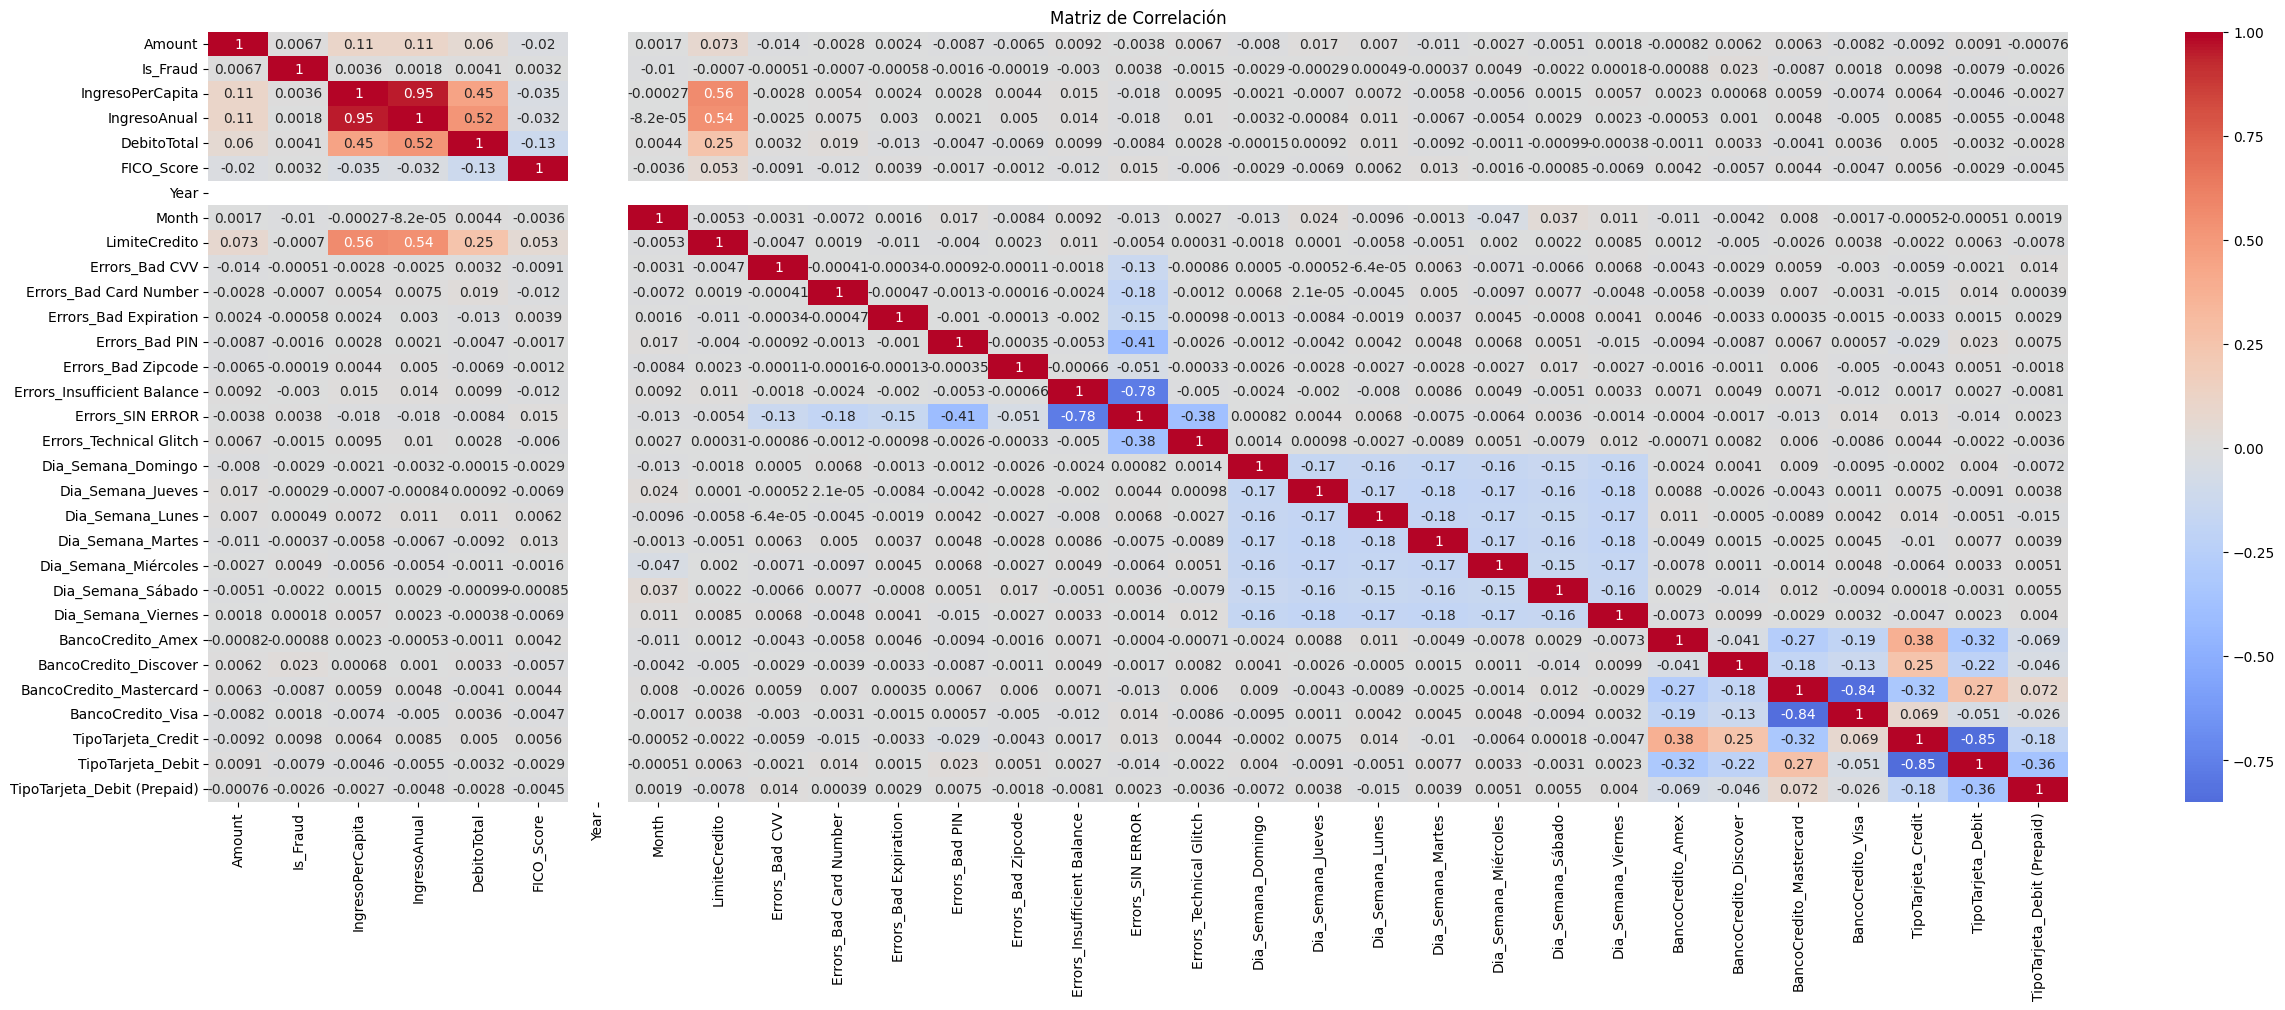

In [82]:
# Graficar la matriz de correlación usando seaborn
plt.figure(figsize=(30, 10))
sns.heatmap(cor1, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()